<a href="https://colab.research.google.com/github/amitbisht99/Student_Performance_Prediction/blob/main/Student%20Performance%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv ("/content/student_performance_prediction.csv")

In [3]:
# configuring display options for dataframe
pd.set_option('display.max_columns', None) # display max columns
pd.set_option('display.max_rows', None) # display max rows

In [4]:
df.sample(5)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
29460,S29461,11.8,101.8,95.9,No,Bachelor,No
189,S00190,2.4,82.0,60.4,Yes,Associate,Yes
6084,S06085,9.5,50.4,28.2,No,Bachelor,Yes
25215,S25216,13.4,82.1,62.3,No,NaN,Yes
39849,S39850,14.7,49.3,68.0,Yes,Doctorate,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [6]:
print ("DataSet Shape:", df.shape) # shape
print ("Total Size:", df.size) # size

DataSet Shape: (40000, 7)
Total Size: 280000


In [7]:
df.columns # columns list

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

# **Handling Missing Values**

In [8]:
# total no. of missing values
total_missin_vals = df.isna().sum().sum()
print (f"{total_missin_vals} values are missing in the dataset.")

11981 values are missing in the dataset.


In [9]:
# total % of missing values
missin_vals_percent = round((total_missin_vals/df.shape[0])*100)
print (f"{missin_vals_percent}% of values are missing in the dataset.")

30% of values are missing in the dataset.


In [10]:
cols_wid_missin_vals = df.columns[df.isna().any()].tolist()
print (f"List of columns with missing values: {cols_wid_missin_vals}")

List of columns with missing values: ['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']


In [11]:
missin_vals_per_col = df [['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']].isna().sum()
missin_vals_per_col

,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [12]:
percent_missin_vals_per_col = (missin_vals_per_col/df.shape[0])*100
percent_missin_vals_per_col

,0
Study Hours per Week,4.9875
Attendance Rate,4.9800
Previous Grades,4.9850
Participation in Extracurricular Activities,5.0000
Parent Education Level,5.0000
Passed,5.0000


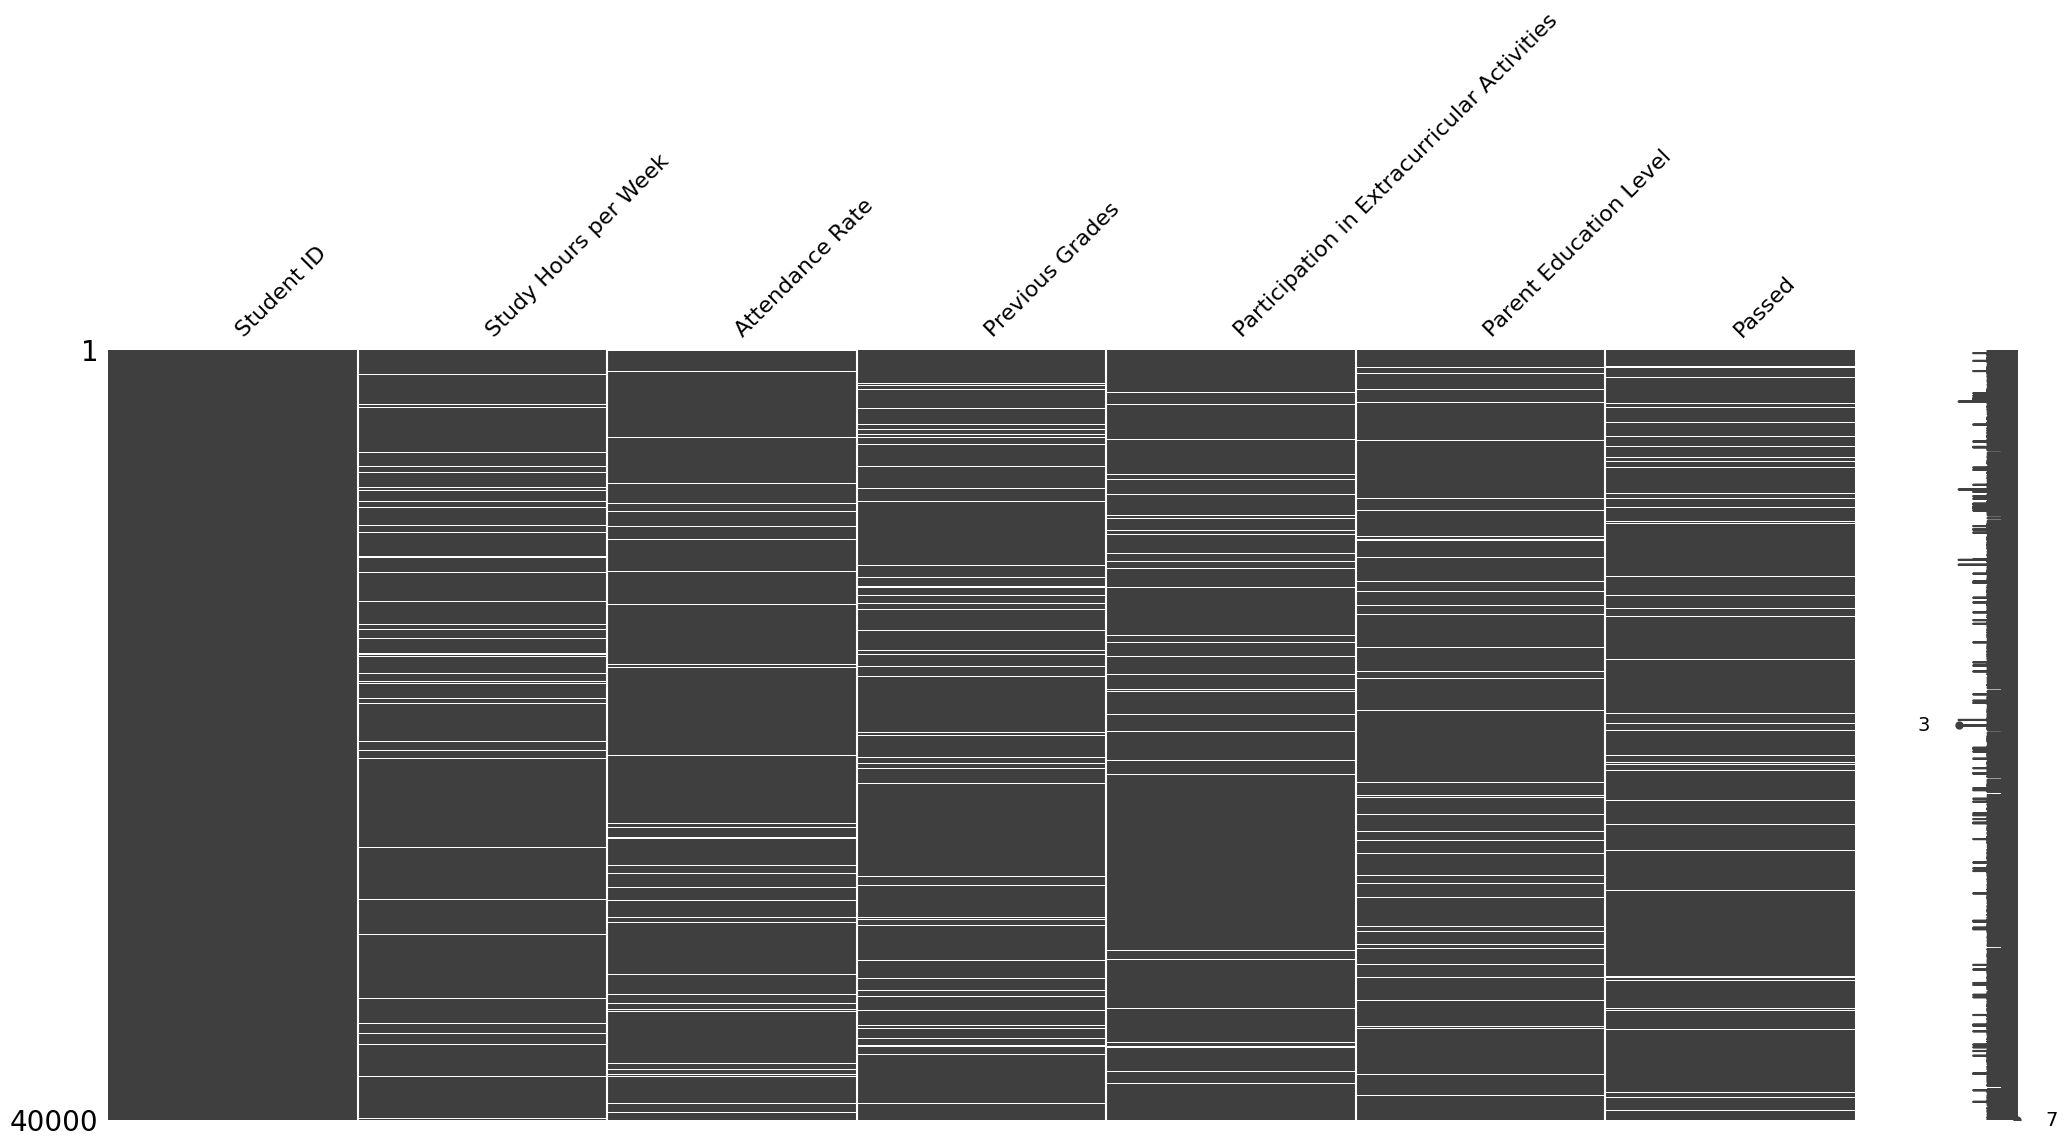

In [13]:
# visual for missing values in the data
import missingno as msno
msno.matrix(df)
plt.show()

In [14]:
df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']].sample(25)

,Study Hours per Week,Attendance Rate,Previous Grades
39166,10.6,65.3,76.5
23873,15.0,45.5,49.6
1832,14.8,95.7,83.0
38374,14.0,72.4,74.6
3806,10.2,103.4,43.0
26264,7.8,75.9,77.7
31900,3.2,45.5,54.5
15301,15.4,82.5,36.7
29081,12.3,99.4,72.1
12264,2.5,64.4,46.1


In [15]:
# mean interpolation for numeric columns

# Calculate the mean for each column
mean_values = df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']].mean()

# Fill missing values with the calculated means
df.fillna(mean_values, inplace=True)

In [16]:
df [['Study Hours per Week', 'Attendance Rate', 'Previous Grades']].isna().sum()

,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0


In [17]:
df [['Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']].sample(25)

,Participation in Extracurricular Activities,Parent Education Level,Passed
23912,No,Associate,Yes
39156,Yes,Master,Yes
27364,NaN,Doctorate,No
18109,NaN,High School,No
1119,No,Bachelor,No
231,Yes,High School,No
10062,Yes,Doctorate,Yes
8388,Yes,Bachelor,Yes
4188,Yes,Associate,Yes
34485,No,Master,No


In [18]:
# mode interpolation for categorical columns

# 1. Select categorical columns
categorical_columns = df.select_dtypes(include="object").columns

# 2. Iterate over categorical columns
for column in categorical_columns:
    # 3. Calculate the mode for the current column
    mode_value = df[column].mode()[0]

    # 4. Fill missing values with the mode
    df[column] = df[column].fillna(mode_value)

In [19]:
df [['Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']].isna().sum()

,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [20]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

# **Handling Outliers & Skewness**

## **col 1: 'Student ID'**

In [21]:
for col in ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Study Hours per Week:
      Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
74        S00075                  -3.1        37.300000        43.100000   
209       S00210                  29.3        75.276323        55.100000   
262       S00263                  -6.2        98.700000        26.200000   
478       S00479                  25.4        84.500000        53.000000   
646       S00647                  -3.5       118.000000        92.600000   
654       S00655                  22.9        60.100000        64.800000   
668       S00669                  -3.3        58.700000        70.600000   
755       S00756                  23.2       107.600000        76.300000   
762       S00763                  22.8        74.000000        69.300000   
1061      S01062                  -4.2        70.800000        46.300000   
1233      S01234                  22.9       105.500000        63.600000   
1453      S01454                  23.0        56.60000

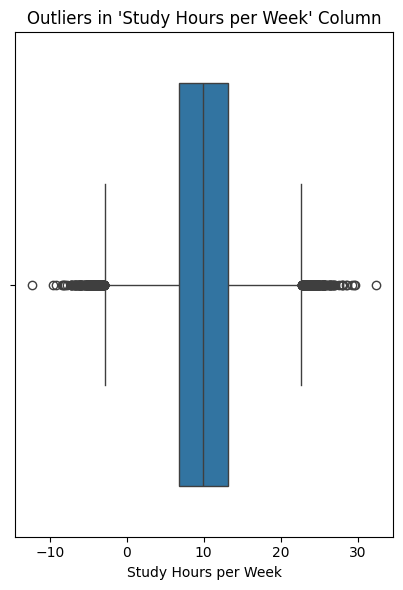

In [22]:
# Create a box plot for each numeric column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Study Hours per Week'])
plt.title("Outliers in 'Study Hours per Week' Column")

plt.tight_layout()
plt.show()

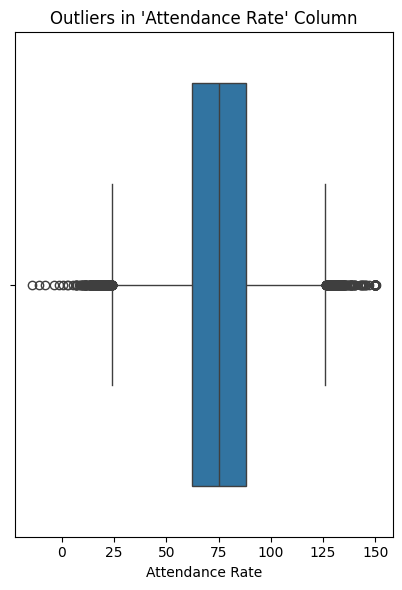

In [23]:
# Create a box plot for each numeric column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Attendance Rate'])
plt.title("Outliers in 'Attendance Rate' Column")

plt.tight_layout()
plt.show()

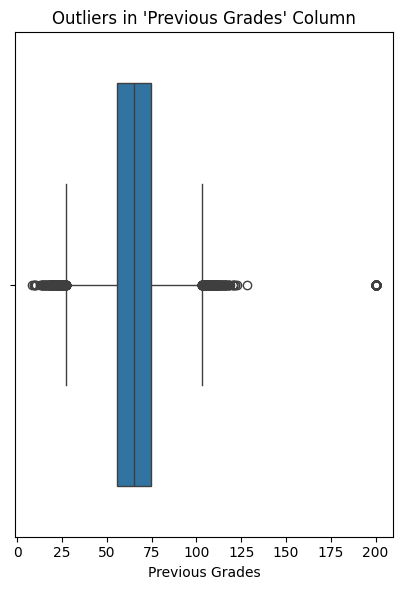

In [24]:
# Create a box plot for each numeric column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Previous Grades'])
plt.title("Outliers in 'Previous Grades' Column")

plt.tight_layout()
plt.show()

In [25]:
skewness = df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']].skew()
print("Skewness in Columns -\n", skewness)

Skewness in Columns -
 Study Hours per Week   -0.011992
Attendance Rate         0.091591
Previous Grades         1.409301
dtype: float64


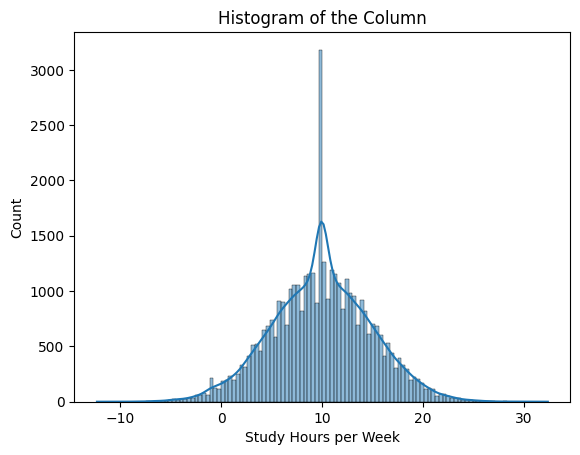

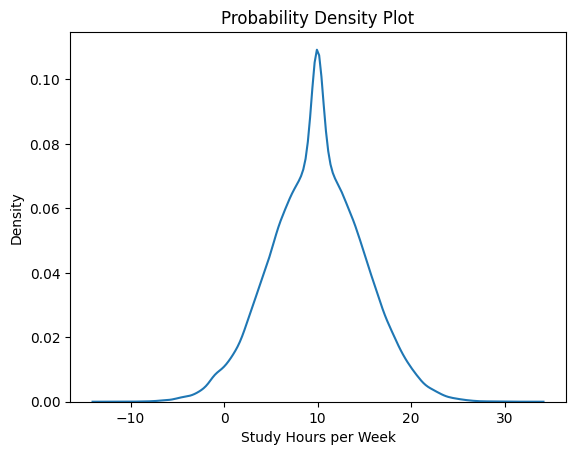

In [26]:
# Histogram
sns.histplot(df['Study Hours per Week'], kde=True)
plt.title('Histogram of the Column')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Study Hours per Week'])
plt.title('Probability Density Plot')
plt.show()

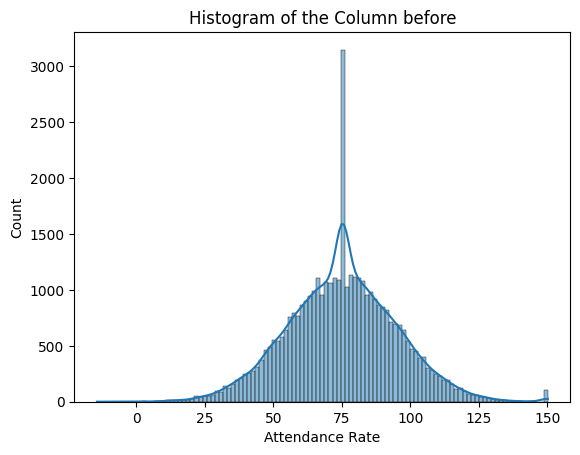

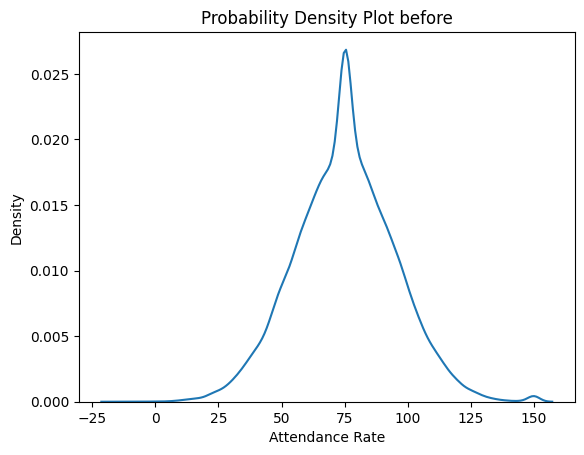

In [27]:
# Histogram
sns.histplot(df['Attendance Rate'], kde=True)
plt.title('Histogram of the Column before')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Attendance Rate'])
plt.title('Probability Density Plot before')
plt.show()

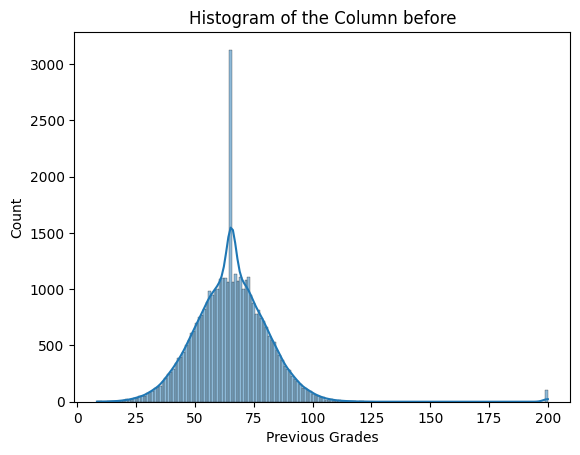

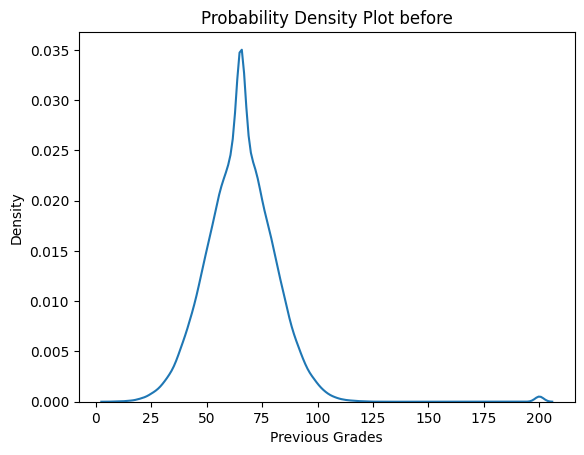

In [28]:
# Histogram
sns.histplot(df['Previous Grades'], kde=True)
plt.title('Histogram of the Column before')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Previous Grades'])
plt.title('Probability Density Plot before')
plt.show()

In [29]:
# Handling Negative Skewness and Outliers

# Handle negative values (if any):
df['Study Hours per Week'] = df['Study Hours per Week'].abs()

# Log transformation
df['Study Hours per Week'] = np.log1p(df['Study Hours per Week'])

# Define thresholds (adjust as needed)
lower_bound = df['Study Hours per Week'].quantile(0.05)
upper_bound = df['Study Hours per Week'].quantile(0.95)

# Cap outliers
df['Study Hours per Week'] = np.clip(df['Study Hours per Week'], lower_bound, upper_bound)

In [30]:
# Winsorization
lower_bound = df['Attendance Rate'].quantile(0.05)
upper_bound = df['Attendance Rate'].quantile(0.95)
df['Attendance Rate'] = np.clip(df['Attendance Rate'], lower_bound, upper_bound)

# Or, Box-Cox Transformation
from scipy.stats import boxcox
df['Attendance Rate'], _ = boxcox(df['Attendance Rate'] + 1)  # Add 1 to handle zero values

In [31]:
# Winsorization
lower_bound = df['Previous Grades'].quantile(0.05)
upper_bound = df['Previous Grades'].quantile(0.95)
df['Previous Grades'] = np.clip(df['Previous Grades'], lower_bound, upper_bound)

# Or, Box-Cox Transformation
from scipy.stats import boxcox
df['Previous Grades'], _ = boxcox(df['Previous Grades'] + 1)  # Add 1 to handle zero values

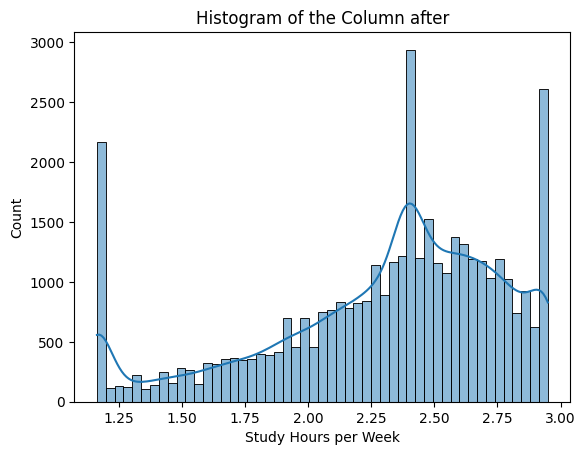

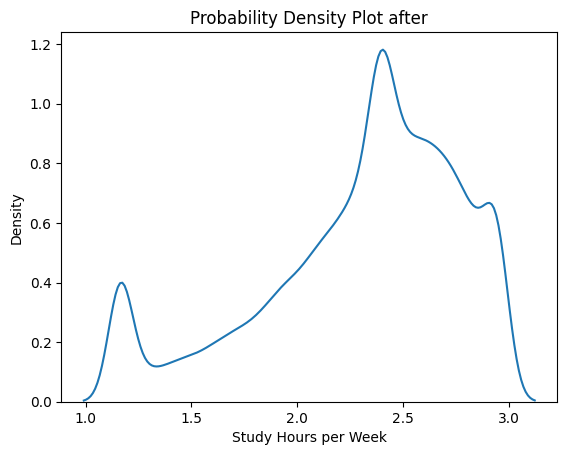

In [32]:
# Histogram
sns.histplot(df['Study Hours per Week'], kde=True)
plt.title('Histogram of the Column after')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Study Hours per Week'])
plt.title('Probability Density Plot after')
plt.show()

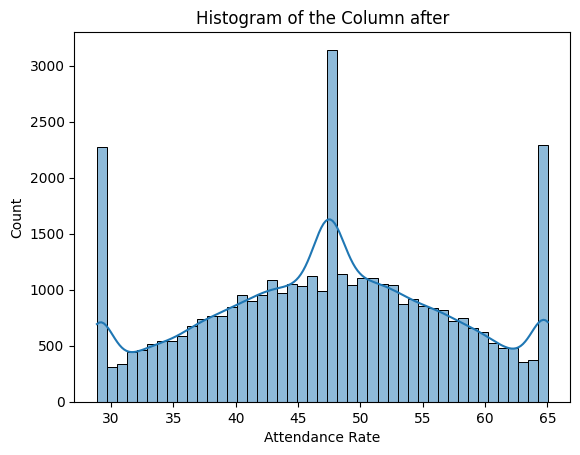

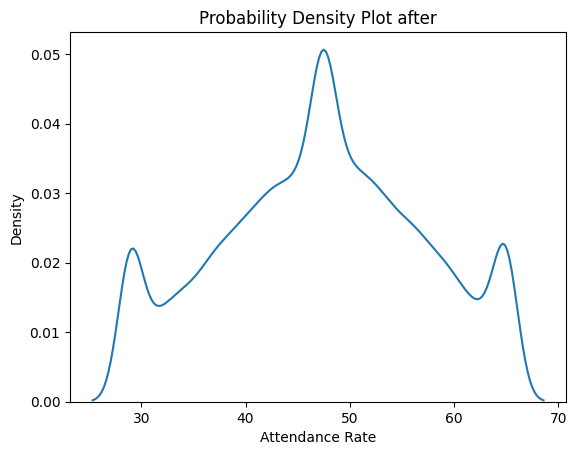

In [33]:
# Histogram
sns.histplot(df['Attendance Rate'], kde=True)
plt.title('Histogram of the Column after')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Attendance Rate'])
plt.title('Probability Density Plot after')
plt.show()

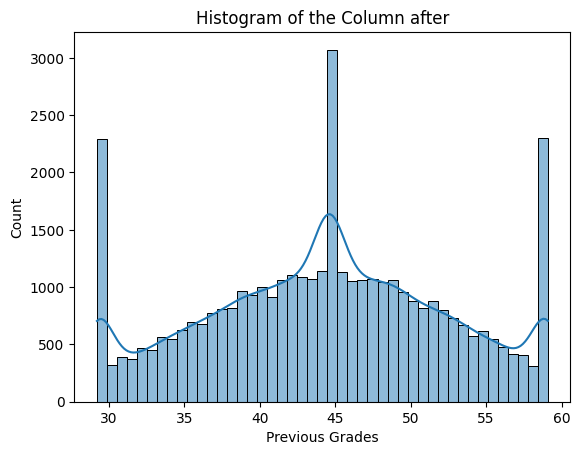

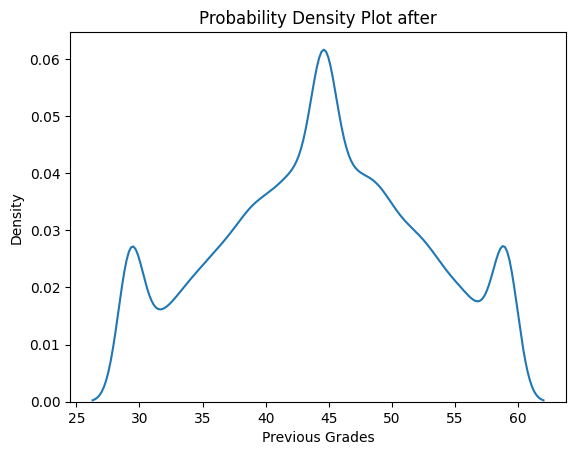

In [34]:
# Histogram
sns.histplot(df['Previous Grades'], kde=True)
plt.title('Histogram of the Column after')
plt.show()

# Probability Density Plot
sns.kdeplot(df['Previous Grades'])
plt.title('Probability Density Plot after')
plt.show()

In [35]:
df.sample(50)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
22365,S22366,1.686399,41.711666,44.276849,No,Bachelor,Yes
29926,S29927,2.610070,48.962673,52.674271,No,High School,Yes
27095,S27096,2.230014,54.868929,41.411704,Yes,Doctorate,Yes
16641,S16642,2.533697,47.469731,53.089276,Yes,High School,No
18782,S18783,2.772589,46.326680,43.060721,No,Master,No
37308,S37309,2.681022,57.651126,35.474846,No,Bachelor,Yes
24124,S24125,2.873565,47.469731,51.545630,Yes,Associate,Yes
32561,S32562,2.624669,56.530143,40.000143,No,Bachelor,Yes
11141,S11142,2.912351,63.206442,49.637294,Yes,Bachelor,No
22246,S22247,2.949688,61.732808,58.739120,No,Doctorate,No


In [36]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,40000.000000,40000.000000,40000.000000
mean,2.299556,47.269724,44.347635
std,0.475081,9.841631,8.107931
min,1.163151,28.869928,29.211787
25%,2.054124,40.306226,38.643792
50%,2.394503,47.469731,44.604509
75%,2.653242,54.331376,50.115275
max,2.949688,65.040925,59.089777


# **One-Hot Encoding**

In [37]:
# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['Participation in Extracurricular Activities', 'Parent Education Level', 'Passed'])

In [38]:
df.sample(25)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities_No,Participation in Extracurricular Activities_Yes,Parent Education Level_Associate,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master,Passed_No,Passed_Yes
21536,S21537,2.778819,53.145802,59.089777,True,False,False,True,False,False,False,True,False
7278,S07279,2.360854,35.007589,55.452617,True,False,True,False,False,False,False,True,False
6331,S06332,1.435085,41.431176,42.267809,False,True,True,False,False,False,False,True,False
18507,S18508,2.351375,40.193463,38.829113,False,True,False,True,False,False,False,False,True
14978,S14979,1.704748,41.935846,49.098836,True,False,False,False,False,True,False,True,False
4817,S04818,2.394503,64.360509,37.156953,False,True,False,False,True,False,False,True,False
35142,S35143,2.949688,65.040925,47.418581,False,True,False,True,False,False,False,False,True
34065,S34066,2.587764,56.904188,45.125516,False,True,False,False,False,False,True,True,False
25745,S25746,2.587764,56.102185,45.488584,False,True,False,True,False,False,False,True,False
17585,S17586,2.949688,45.110709,44.640824,False,True,False,False,False,False,True,True,False


In [39]:
df.dtypes

,0
Student ID,object
Study Hours per Week,float64
Attendance Rate,float64
Previous Grades,float64
Participation in Extracurricular Activities_No,bool
Participation in Extracurricular Activities_Yes,bool
Parent Education Level_Associate,bool
Parent Education Level_Bachelor,bool
Parent Education Level_Doctorate,bool
Parent Education Level_High School,bool


In [41]:
df.to_csv ('Student Performance Prediction Data 2.csv', index = False)